In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("INR-USD.csv")

print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000     0.0
1  2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000     0.0
2  2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002     0.0
3  2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999     0.0
4  2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001     0.0


In [4]:
# Let’s check if the dataset contains any missing values before moving forward:

print(data.isnull().sum())

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64


In [5]:
# The dataset has some missing values. Here’s how to remove them:

data = data.dropna()

In [6]:
# Now let’s have a look at the descriptive statistics of this dataset:

print(data.describe())


              Open         High          Low        Close    Adj Close  Volume
count  1013.000000  1013.000000  1013.000000  1013.000000  1013.000000  1013.0
mean     58.035208    58.506681    57.654706    58.056509    58.056509     0.0
std      12.614635    12.716632    12.565279    12.657407    12.657407     0.0
min      38.995998    39.334999    38.979000    39.044998    39.044998     0.0
25%      45.508999    45.775002    45.231998    45.498001    45.498001     0.0
50%      59.702999    60.342999    59.209999    59.840000    59.840000     0.0
75%      68.508499    69.099998    68.250000    68.538002    68.538002     0.0
max      82.917999    83.386002    82.563004    82.932999    82.932999     0.0


In [7]:
# USD – INR Conversion Rate Analysis:

figure = px.line(data, x="Date",
                 y="Close",
                 title='USD - INR Conversion Rate over the years')
figure.show()

In [8]:
# Now let’s add year and month columns in the data before moving forward:
data["Date"] = pd.to_datetime(data["Date"], format = '%Y-%m-%d')
data['Year'] = data['Date'].dt.year
data["Month"] = data["Date"].dt.month
print(data.head())

        Date       Open       High        Low      Close  Adj Close  Volume  \
0 2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000     0.0   
1 2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000     0.0   
2 2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002     0.0   
3 2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999     0.0   
4 2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001     0.0   

   Year  Month  
0  2003     12  
1  2003     12  
2  2003     12  
3  2003     12  
4  2003     12  


In [9]:
#Now let’s have a look at the aggregated yearly growth of the conversion rates between INR and USD:

import plotly.graph_objs as go
import plotly.io as pio

# Calculate yearly growth
growth = data.groupby('Year').agg({'Close': lambda x: (x.iloc[-1]-x.iloc[0])/x.iloc[0]*100})

fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index,
                     y=growth['Close'],
                     name='Yearly Growth'))

fig.update_layout(title="Yearly Growth of USD - INR Conversion Rate",
                  xaxis_title="Year",
                  yaxis_title="Growth (%)",
                  width=900,
                  height=600)

pio.show(fig)

In [12]:
#Now let’s have a look at the aggregated monthly growth of the conversion rates between INR and USD:

# Calculate monthly growth
data['Growth'] = data.groupby(['Year', 'Month'])['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Group data by Month and calculate average growth
grouped_data = data.groupby('Month').mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data['Month'],
    y=grouped_data['Growth'],
    marker_color=grouped_data['Growth'],
    hovertemplate='Month: %{x}<br>Average Growth: %{y:.2f}%<extra></extra>'
))

fig.update_layout(
    title="Aggregated Monthly Growth of USD - INR Conversion Rate",
    xaxis_title="Month",
    yaxis_title="Average Growth (%)",
    width=900,
    height=600
)

pio.show(fig)

<ipython-input-12-86510b8acd7a>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 640x480 with 0 Axes>

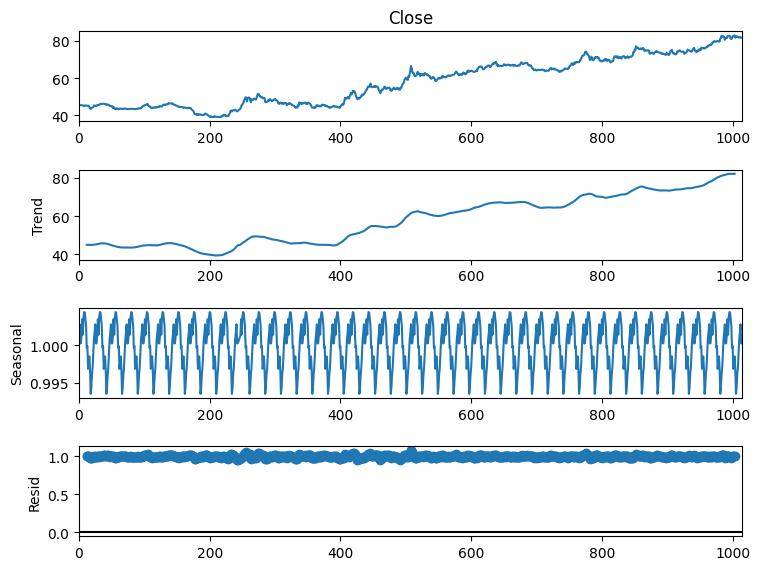

In [14]:
#Forecasting Exchange Rates Using Time Series Forecasting:

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(8, 6)
fig.show()

In [17]:
#Here’s how to find p,d, and q values using pmdarima:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from pmdarima.arima import auto_arima
model = auto_arima(data['Close'], seasonal=True, m=52, suppress_warnings=True)
print(model.order)

(2, 1, 0)


In [19]:
p, d, q = 2, 1, 0

In [21]:
# Now, here’s how to use SARIMA to train a model to forecast currency exchange rates:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data["Close"], order=(p, d, q),
                seasonal_order=(p, d, q, 52))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1013
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -905.797
Date:                            Sun, 25 Jun 2023   AIC                           1821.594
Time:                                    23:25:43   BIC                           1845.929
Sample:                                         0   HQIC                          1830.861
                                           - 1013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      0.026      1.193      0.233      -0.020       0.083
ar.L2          0.0643      0.026   

In [24]:
# Now here’s how to make predictions about future currency exchange rates:

predictions = fitted.predict(len(data), len(data)+60)
print(predictions)

1013    81.732807
1014    81.886990
1015    82.180319
1016    82.607754
1017    82.474242
          ...    
1069    84.906873
1070    85.402528
1071    85.520223
1072    85.830554
1073    85.687360
Name: predicted_mean, Length: 61, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [25]:
# Here’s how to visualize the forecasted results:

# Create figure
fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Close'],
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='green')
))

fig.update_layout(
    title="INR Rate - Training Data and Predictions",
    xaxis_title="Date",
    yaxis_title="Close",
    legend_title="Data",
    width=900,
    height=600
)

pio.show(fig)